# Case 3
Higher model fit will be accompanied with a lower conditional number (well-conditioned vs ill-conditioned).

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, time
from tqdm import tqdm
import random

#import package
sys.path.extend(os.path.join(os.getcwd(),'Point_Geometry_Package'))

from Point_Geometry_Package.get_random_subsamples import get_random_subsamples
from Point_Geometry_Package.simulate_sinkhole_parameter_retrieval2 import simulate_sinkhole

In [2]:
obj = simulate_sinkhole()
obj.n_sims = 100
obj.simulate_sinkhole_parameter_retrieval()

Simulating:   0%|                                                                              | 0/100 [00:00<?, ?it/s]H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:64: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:47: RuntimeWarning: overflow encountered in double_scalars
  A2 = ((2*v*t*np.pi*r**2)/(R**3))*zg(R,r)
Simulating:  32%|██████████████████████                                               | 32/100 [01:21<02:49,  2.49s/it]H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:55: RuntimeWarning: invalid value encountered in matmul
  dx = Qxhat @ J.T @ invQyy @ dy
Simu

NameError: name 'n_sims' is not defined

Median conditional number: 1834936.36.
Mean Model fit: 57.38%.


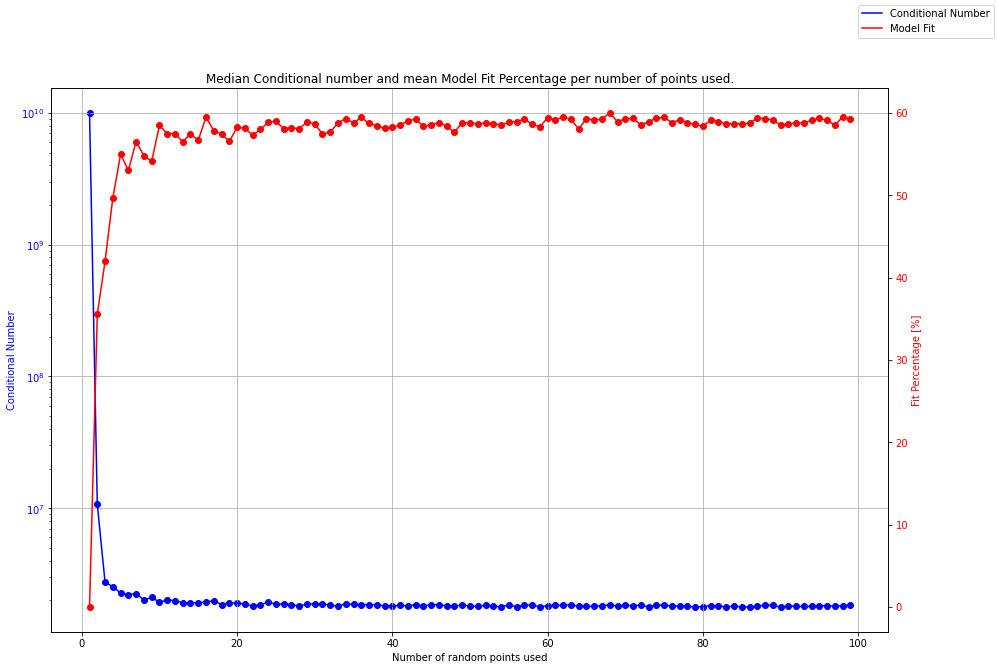

In [3]:
#condition number
avg_cond = np.median(obj.cond_number_total_save,axis=0)

#extracting average fit percentages    
avg_data = np.sum(obj.fit_total_save,axis=0)/obj.n_sims

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.plot(obj.number_subs,avg_cond,c='b',label='Conditional Number')
ax1.scatter(obj.number_subs,avg_cond,c='b')
ax1.set_yscale('log')

ax1.set_title('Median Conditional number and mean Model Fit Percentage per number of points used.')
ax1.set_ylabel('Conditional Number',color='b')
ax1.set_xlabel('Number of random points used')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj.number_subs,avg_data,c='r',label='Model Fit')
ax2.scatter(obj.number_subs,avg_data,c='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.legend()
ax1.grid(True);

print('Median conditional number: {:.02f}.'.format(np.median(avg_cond)))
print('Mean Model fit: {:.02f}%.'.format(np.mean(avg_data)))

# Conclusion
- The higher the model fit percentage the lower the conditional number.
- The conditional number will converge to a specific value and not to zero or one.